In [1]:
# Imports and Setup
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import librosa
import IPython.display

# has to be set in order to show the image in notebook
%matplotlib inline 

/Library/Python/2.7/site-packages/librosa/core/audio.py:33: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [24]:
try:
    os.chdir("./Resources")
except:
    pass

y, sr = librosa.load('./single-snare-2.wav')
# y, sr = librosa.load("./and-kick-snare.wav", duration=1, offset=7.5) # keep for snare-kick sampling
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

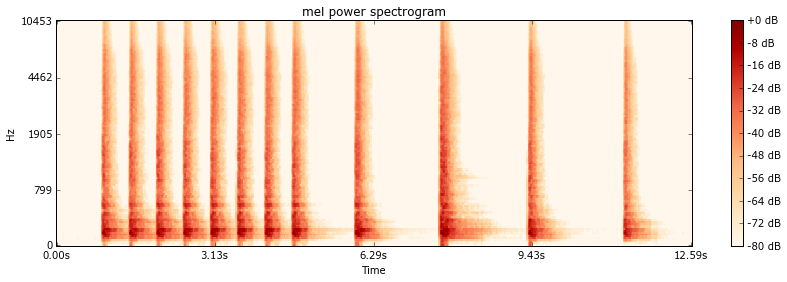

In [25]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

o_env = librosa.onset.onset_strength(y, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [26]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times  = librosa.frames_to_time(onset_frames[:], sr=sr)

(0.0, 544.0, 0.0, 26.570291069552013)

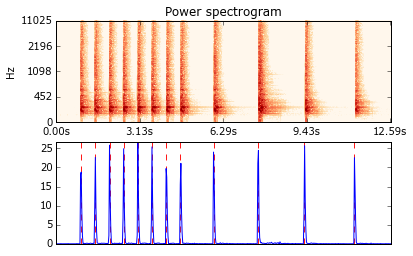

In [27]:
D = np.abs(librosa.stft(y))**2
plt.figure()

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2)
plt.plot(o_env, label='Onset strength')
plt.vlines(onset_frames, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.xticks([])
plt.axis('tight')

In [28]:
onset_stfts = []
for frame in onset_frames:
    print np.abs(D[:, frame])
    onset_stfts.append(np.abs(D[:, frame]))

[ 0.53278297  0.92431653  2.03718185 ...,  0.19301479  0.01329125
  0.03504202]
[  3.79524827   8.1771574   30.08757973 ...,   0.70687509   0.63494575
   0.25530031]
[  8.96783066   1.1389333   11.68592644 ...,   0.27940261   0.01241628
   0.07317045]
[ 28.62179565  29.24474144  17.18811417 ...,   0.06659895   0.05549093
   0.17358913]
[ 10.99756718  25.13424683  24.69608307 ...,   0.06689073   0.53692263
   1.21209168]
[  2.86994982  10.8002739   18.04516411 ...,   0.96037376   1.72300732
   1.46855915]
[  8.20520496  14.02727032  24.92991066 ...,   0.03323143   0.48488253
   0.76600057]
[  9.47333450e+01   1.01460144e+02   7.97702713e+01 ...,   2.49252263e-02
   7.12274536e-02   1.01369143e-01]
[  2.95823021e+01   7.76657915e+00   1.93164101e+01 ...,   3.11161995e-01
   1.59789436e-02   5.50020300e-02]
[  7.62749612e-02   1.29017029e+02   8.16817688e+02 ...,   4.08185124e-01
   2.22500443e+00   9.87922668e-01]
[  5.25572929e+01   8.48649826e+01   1.46476120e+02 ...,   1.84734136e-01


In [29]:
filename = raw_input()

snareDrums3.csv


In [30]:
with open('../Data/' + filename, 'w+') as f:
    fw = csv.writer(f, delimiter=',')
    
    for i in range(len(onset_frames)):
        # onset_stfts is an array of ndarrays so we need to cast to list
        fw.writerow([onset_frames[i], onset_stfts[i].tolist()]) 